In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

## Generate frame file

In [2]:
fid = pd.read_csv('../../RBC_fid_table.csv')
fid.head(6)

,Barcodes,Sets,Types,Timepoint,Position,FileName
0,ATCACG,8,S24,0,ATCACG,ATCACG-s_5_1
1,TTAGGC,8,S24,1,TTAGGC,TTAGGC-s_5_1
2,CAGATC,8,S24,2,CAGATC,CAGATC-s_5_1
3,ACAGTG,9,S24,0,ACAGTG,ACAGTG-s_5_1
4,GCCAAT,9,S24,1,GCCAAT,GCCAAT-s_5_1
5,CTTGTA,9,S24,2,CTTGTA,CTTGTA-s_5_1


In [35]:
for i in range(24):
    fname = fid['FileName'][i]
    fid['FileName'][i] = '24filesDec_'+fname
fid.head(2)

/Users/Yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Barcodes,Sets,Types,Timepoint,Position,FileName
0,ATCACG,8,S24,0,ATCACG,24filesDec_ATCACG-s_5_1
1,TTAGGC,8,S24,1,TTAGGC,24filesDec_TTAGGC-s_5_1


In [3]:

with open('command.txt', 'a') as f:
    for i in range(24):
        if fid['Types'][i]=='RNA':
            types = 'RNA'
        else:
            types = 'RPF'
        line = 'python frameGroups_human_stepOne_noThreshold.py ../processedData_24filesDec/' + fid['FileName'][i] +'/ '+types+'\n'
        f.write(line)
        
    for i in range(24,30):
        if fid['Types'][i]=='RNA':
            types = 'RNA'
        else:
            types = 'RPF'
        line = 'python frameGroups_human_stepOne_noThreshold.py ../processedData/' + fid['FileName'][i] +'/ '+types+'\n'
        f.write(line)    

In [4]:
rna = pd.read_csv('fakeRNA.txt',delimiter=',')
rpf = pd.read_csv('fakeRPF.txt',delimiter=',')

In [5]:
comb = rna.append(rpf)
comb

,Fraction of reads,Frame,Type
0,0.38,1,RNA-seq
1,0.35,2,RNA-seq
2,0.27,3,RNA-seq
0,0.50,1,RPF
1,0.30,2,RPF
2,0.20,3,RPF


In [64]:
def plotBar(data,batch):
    g=sns.catplot(x='Type',y='Fraction of reads',hue='Frame',
           kind='bar',data=data)
    g.set_axis_labels("", "Fraction of reads")
    #g.despine(left=True)
    fname = batch[0]+' t'+str(batch[1])+' set'+str(batch[2])
    g.savefig(fname+' frame barplot.eps')

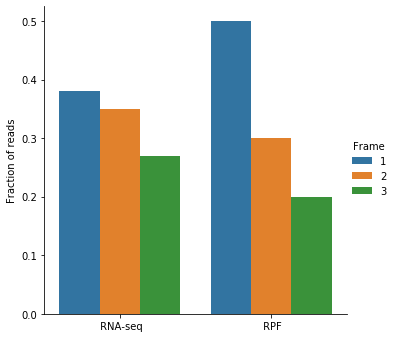

In [6]:
g=sns.catplot(x='Type',y='Fraction of reads',hue='Frame',
           kind='bar',data=comb)
g.set_axis_labels("", "Fraction of reads")
#g.despine(left=True)
g.savefig('sample_frame_bar.eps')

/Users/Yue/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/Yue/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/Yue/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

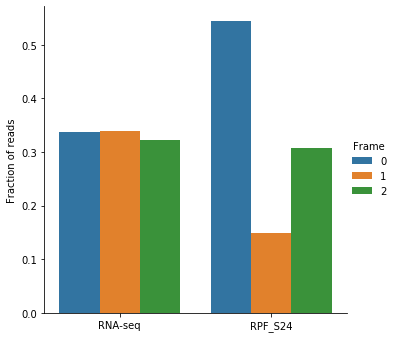

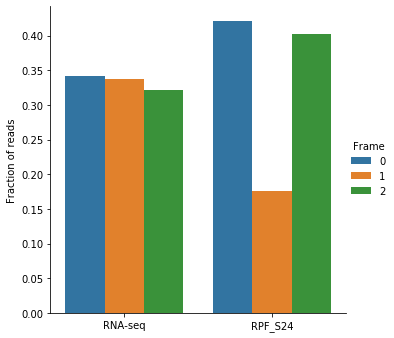

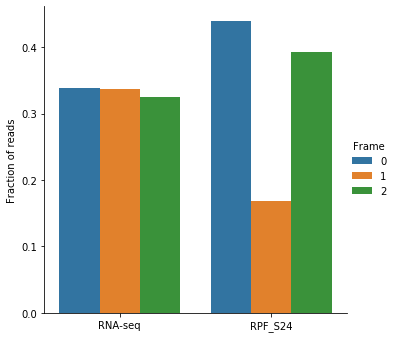

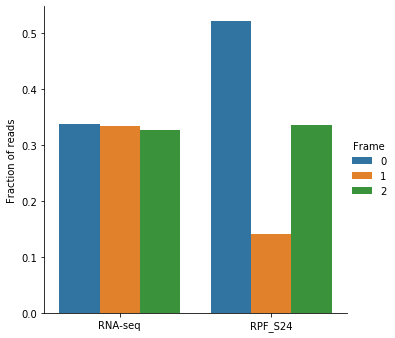

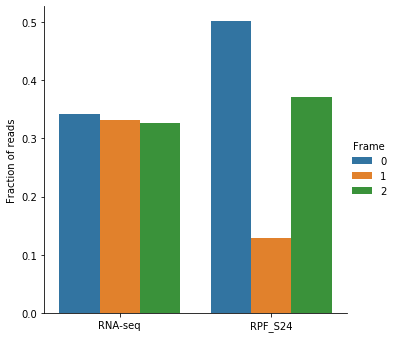

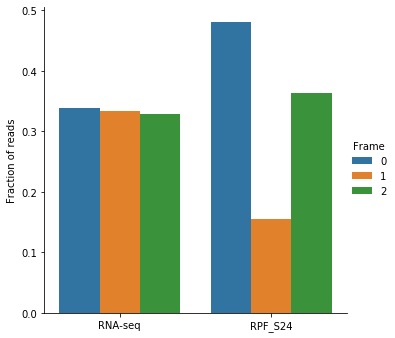

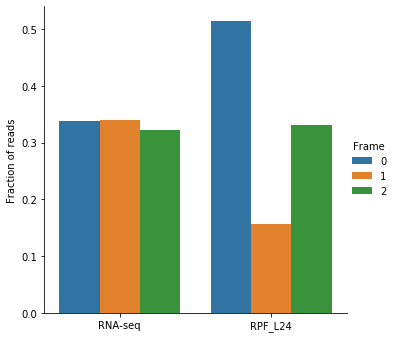

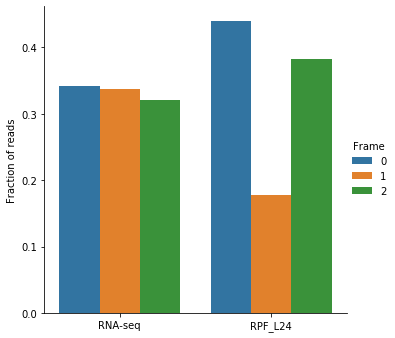

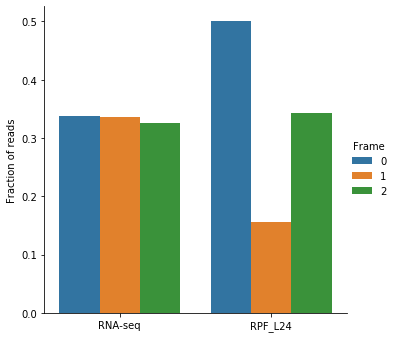

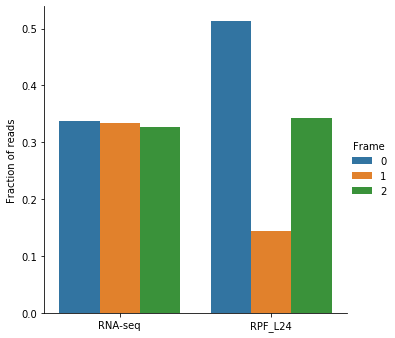

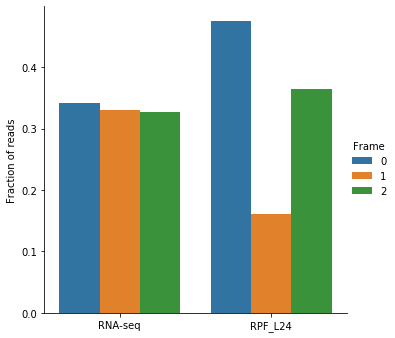

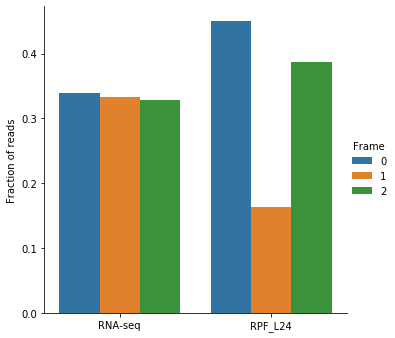

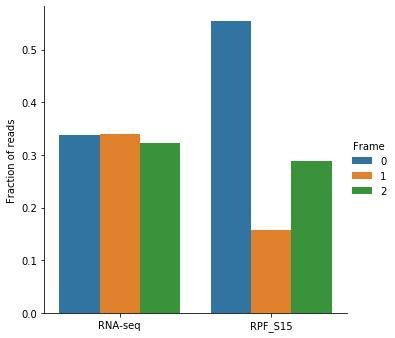

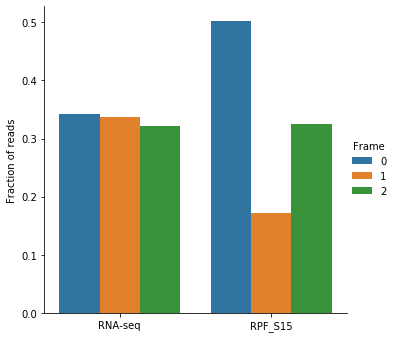

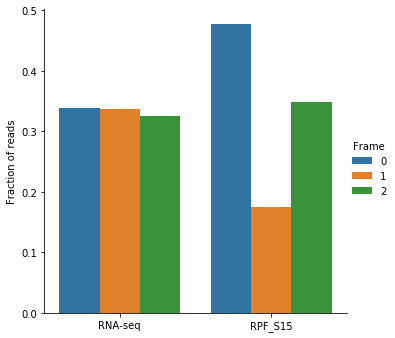

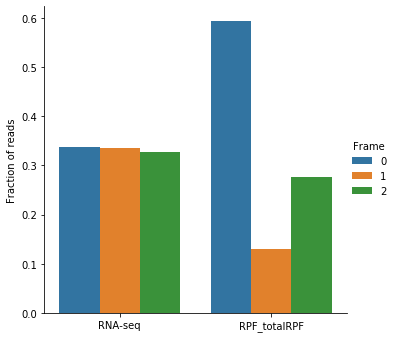

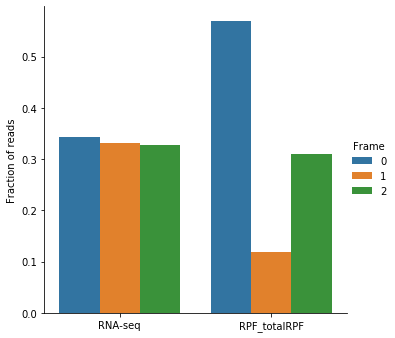

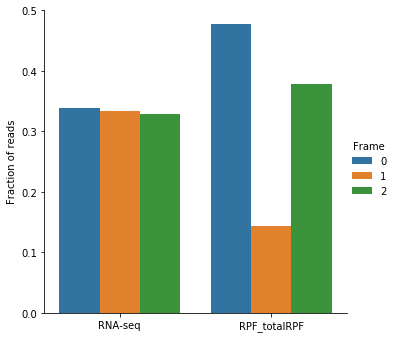

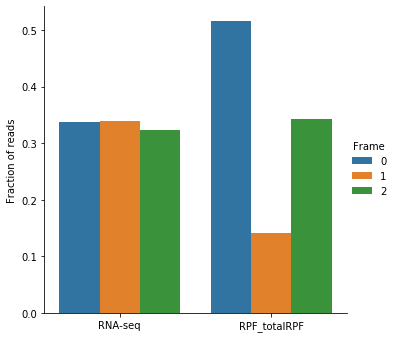

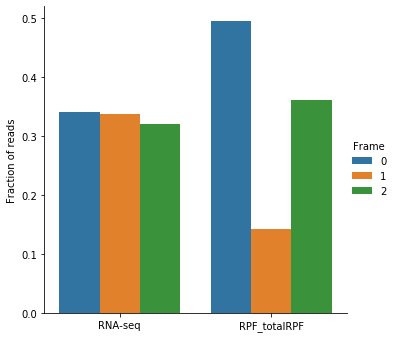

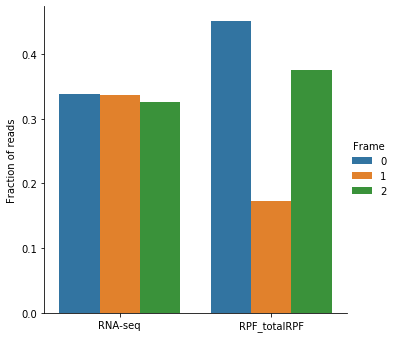

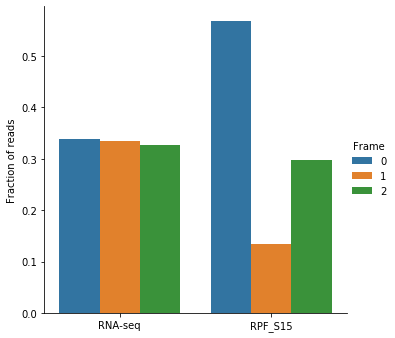

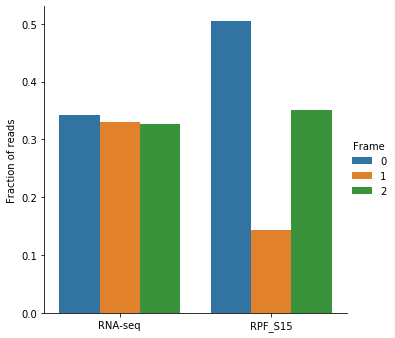

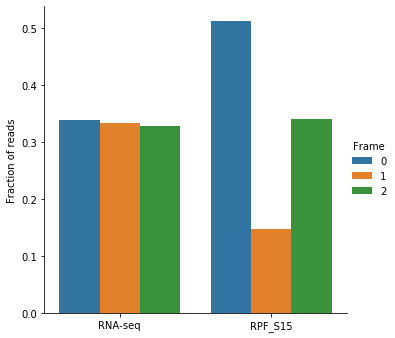

In [66]:
for i in range(30):
    batch = [fid['Types'][i],fid['Timepoint'][i],fid['Sets'][i]]
    if batch[0]=='RNA':
        continue
    if batch[0]!='RPF':
        batch[0]='RPF_'+batch[0]
    rna_row = fid[(fid['Types']== 'RNA') & (fid['Timepoint']==batch[1]) & (fid['Sets']==batch[2])]
    rpf_file = pd.read_csv('dat_includeall/processedData_'+fid['FileName'][i]+'_frame.csv',header=None)
    rna_file = pd.read_csv('dat_includeall/processedData_'+rna_row['FileName'].item()+'_frame.csv',header=None)
    rpf_file.columns=['Frame','Fraction of reads']
    rpf_file['Type']=batch[0]
    rna_file.columns=['Frame','Fraction of reads']
    rna_file['Type']='RNA-seq'
    rpf_file['Fraction of reads'] /= sum(rpf_file['Fraction of reads']) 
    rna_file['Fraction of reads'] /= sum(rna_file['Fraction of reads']) 
    comb=rna_file.append(rpf_file)
    plotBar(comb,batch)

In [58]:
rpf_file['Fraction of reads'] /= sum(rpf_file['Fraction of reads']) 

In [59]:
rpf_file

,Frame,Fraction of reads,Type
0,0,0.544599,RPF_S24
1,1,0.148229,RPF_S24
2,2,0.307172,RPF_S24
